In [1]:
#Importation librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importation de jeu de données nettoyées:

data=pd.read_csv("data_food_cleaned.csv",low_memory=False)

In [3]:
data.iloc[0:5]

,code,product_name,pnns_groups_2,main_category_en,image_small_url,image_url,nutriscore_score,nutriscore_grade,pnns_groups_1,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000000100,moutarde au moût de raisin,dressings and sauces,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,18.0,d,fat and sauces,224.0,936.0,8.0,2.0,29.0,22.0,0.0,5.0,3.0,1.0
1,0000000000949,Salade de carottes râpées,one dish meals,Seasoned shredded carrots,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,32.0,134.0,0.0,0.0,5.0,4.0,3.0,1.0,0.0,0.0
2,0000000001281,Tarte noix de coco,biscuits and cakes,Coconut pies,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,14.0,d,sugary snacks,381.0,1594.0,22.0,16.0,27.0,22.0,4.0,5.0,0.0,0.0
3,0000000001885,Compote de poire,fruits,Pear compotes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,-2.0,a,fruits and vegetables,157.0,657.0,0.0,0.0,36.0,27.0,4.0,1.0,0.0,0.0
4,0000000002257,Salade de macedoine de légumes,one dish meals,Vegetables macedoines,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,143.0,598.0,13.0,1.0,4.0,1.0,5.0,2.0,0.0,0.0


In [4]:
#1-Analyses univariées :

#statistiques descriptives
data.describe()

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,287340.000000,287340.000000,287340.000000,287340.000000,287340.000000,287340.000000,287340.000000,287340.000000,287340.000000,287340.000000,287340.000000
mean,9.090621,273.848528,1144.824643,13.966788,5.146224,25.082543,10.867686,2.036803,8.569426,0.776373,0.255805
std,8.624024,191.187884,797.304401,15.497258,6.468958,27.013081,14.286575,2.165408,8.244211,0.933220,0.436313
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,112.000000,471.000000,1.000000,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,252.000000,1050.000000,8.000000,2.000000,12.000000,3.000000,2.000000,6.000000,0.000000,0.000000
75%,15.000000,397.000000,1661.000000,23.000000,8.000000,50.000000,17.000000,3.000000,13.000000,1.000000,1.000000
max,40.000000,831.000000,3462.000000,56.000000,20.000000,122.000000,41.000000,9.000000,30.000000,3.000000,1.000000


In [5]:
#Après le nettoyage on constate que les valeurs de  paramètres statistiques sont significatives et cohérentes
#avec les définitions des Variable 

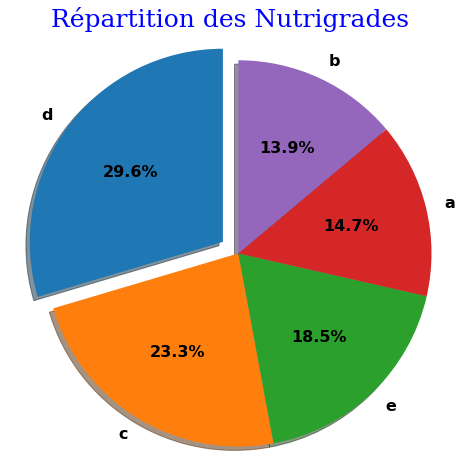

In [6]:
#La répartition des valeurs de nutrigrade :

nutrigrades = data.groupby(by='nutriscore_grade')['code'].nunique().sort_values(ascending=False)

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes = np.zeros(5)
explodes[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(nutrigrades, labels=nutrigrades.index, explode=explodes, autopct='%1.1f%%',shadow=True, startangle=90,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des Nutrigrades", fontdict=font)
plt.show()


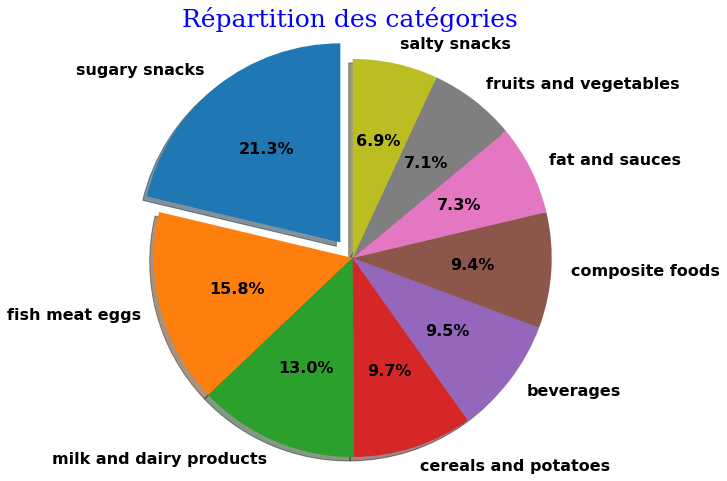

In [7]:
#La répartition des catégories :

categories = data.groupby(by='pnns_groups_1')['code'].nunique().sort_values(ascending=False)

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes = np.zeros(9)
explodes[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(categories, labels=categories.index, explode=explodes, autopct='%1.1f%%',shadow=True, startangle=90,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des catégories", fontdict=font)
plt.show()

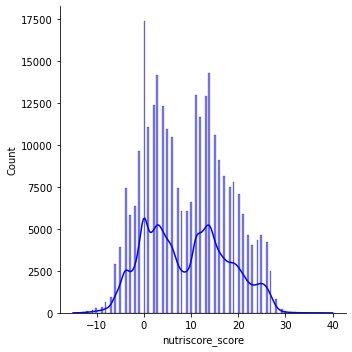

In [8]:
#la répartition des valeurs de nutriscore_score

sns.displot(data[data['nutriscore_score'].notnull()]['nutriscore_score'], kde=True,color="blue")



In [9]:
#2-Analyses bivariées : 


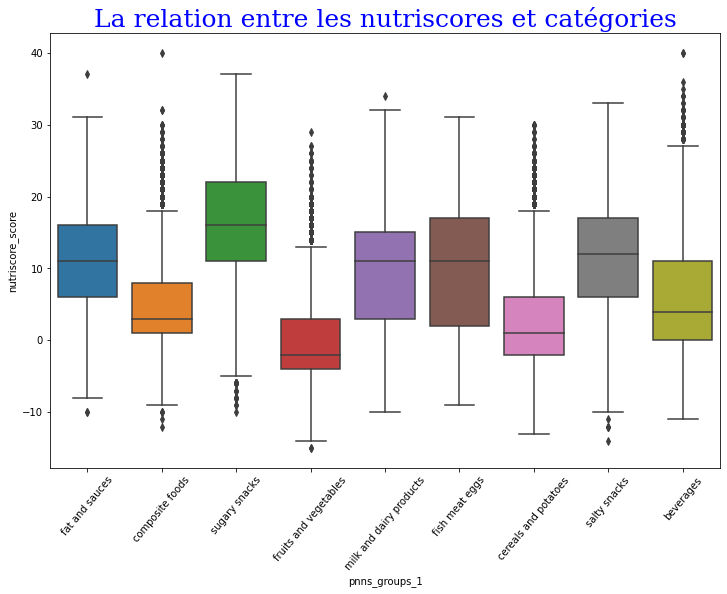

In [10]:
#Croisement d’une variable quantitative et d’une variable qualitative

# le nutriscore est-il différent selon la catégorie ?

#Croisons les deux variables pnns_groups_1 (catégorielle) et nutriscore_score (numérique) en
#créant une boîtes à moustache 


#Représentation graphique
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data, x='pnns_groups_1', y='nutriscore_score')
plt.setp(ax.get_xticklabels(), rotation=50)
plt.title("La relation entre les nutriscores et catégories", fontdict=font)
plt.show()



In [11]:
#Dans le graphique ci-dessus, on voit que les produits de la catégorie fruits and vegetables 
#ont l’air d’être plus saines même si l'écart est faible, au contraire les produits de la catégorie sugary snacks

#la présence d’outliers dans les groupes laisse envisager un défaut de normalité des résidus

#Les boxplots de certains groupes étant plus étendus que d’autres 
#cela laisse penser que les résidus ne seront probablement pas homogènes.



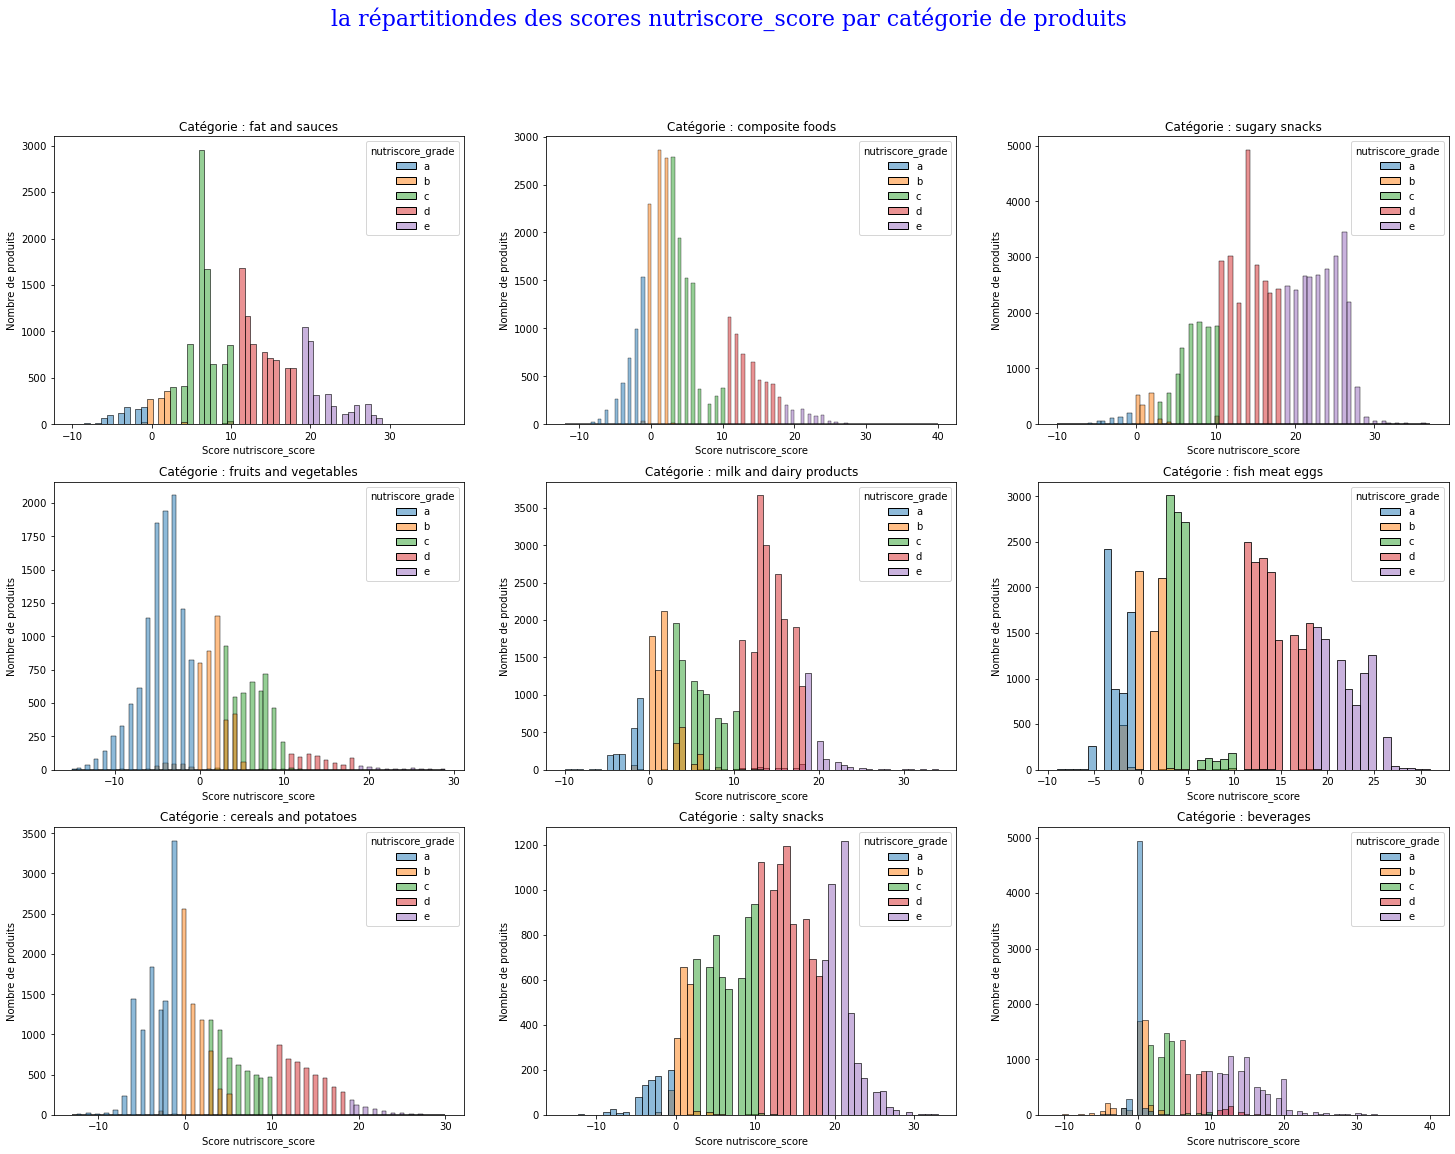

In [12]:
# la répartition des scores nutriscore_score par catégorie de produits

rows = len(data['pnns_groups_1'].unique())
cols = 3
fig, axes = plt.subplots(int(rows/cols), cols, sharex=False, sharey=False, figsize=(25,int(2*rows)))
axes = np.array(axes)
fig.suptitle("la répartitiondes des scores nutriscore_score par catégorie de produits", fontdict=font, fontsize=22)
i=0
for ax in axes.reshape(-1):
    cats = data['pnns_groups_1'].unique()[i]
    subset = data[data['pnns_groups_1']==cats].sort_values("nutriscore_grade")
    sns.histplot(data=subset, x="nutriscore_score", hue="nutriscore_grade", ax=ax)
    ax.set_title('Catégorie : {}'.format(cats))
    ax.set_xlabel("Score nutriscore_score")
    ax.set_ylabel("Nombre de produits")
    i+=1
plt.show()

In [13]:
#on remarque que la distribution ne suit pas une loi normale

In [14]:
#Effectuer le test statistique pour vérifier l'influence des catégories sur les scores de nutriscore_score :     

#comme c'est une analyse statistique pour détecter s'il y a influence d'une variable qualitative (pnns_groups_1)
#sur une variable quantitative (nutriscore_score) alors on va faire analyse de variance ANOVA 

#mais les trois conditions pour l’ANOVA:

#1. Les 9 échantillons (par catégories) sont indépendants.
#2. La variable nutriscore_score étudiée suit une loi normale dans les 
# 9 populations comparées.
#3. Les 9 populations comparées ont même variance : 
#Homogénéité des variances ou homoscédasticité

# ne sont pas  satisfaites sauf la première condition 

In [15]:
#Réalisation alors de l’ANOVA non paramétrique (test de Kruskal- Wallis) :

#Les hypothèses posées seront donc les suivantes :

# H0 : La distribution des 9 groupes est similaire (la catégorie n'a aucune influence sur le nutriscore_score).
# H1 : une ou plusieures distributions sont inégales (la catégorie a  influence sur le nutriscore_score).

In [16]:
#Le test de Kruskal- Wallis :
import scipy
groups = {}
for grp in data["pnns_groups_1"].unique():
    groups[grp] = data["nutriscore_score"][data["pnns_groups_1"]==grp].values
args = groups.values()
scipy.stats.kruskal(*args)

KruskalResult(statistic=93413.66353135406, pvalue=0.0)

In [17]:
#Le résultat du test de Kruskal- Wallis donne une p-value de 0 pour l'ensemble des catégories,
#étant inférieure à 0.05 donc l'hypothèse H0 selon laquelle les ditributions sont similaires est rejetée.

#Alors la catégorie de produit a donc une influence sur le nutriscore_score.

In [18]:
#analyser les corrélations linéaires entre les variables quantitatives,
#avec le  test de corrélation de Pearson

matrice_corr = data.corr()

In [19]:
matrice_corr

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
nutriscore_score,1.000000,0.551175,0.551295,0.555125,0.662074,0.192589,0.384846,-0.090737,0.094886,0.317003,0.312905
energy-kcal_100g,0.551175,1.000000,0.994425,0.786216,0.608602,0.362143,0.265143,0.238661,0.165199,0.019344,0.034045
energy_100g,0.551295,0.994425,1.000000,0.787308,0.608739,0.363539,0.265817,0.240283,0.164003,0.019317,0.033519
fat_100g,0.555125,0.786216,0.787308,1.000000,0.773636,-0.138351,-0.047583,0.073204,0.228509,0.162446,0.165168
saturated-fat_100g,0.662074,0.608602,0.608739,0.773636,1.000000,-0.086100,0.058401,-0.064153,0.273002,0.133771,0.132967
carbohydrates_100g,0.192589,0.362143,0.363539,-0.138351,-0.086100,1.000000,0.703677,0.326945,-0.261532,-0.272819,-0.253553
sugars_100g,0.384846,0.265143,0.265817,-0.047583,0.058401,0.703677,1.000000,0.132791,-0.347139,-0.358152,-0.316672
fiber_100g,-0.090737,0.238661,0.240283,0.073204,-0.064153,0.326945,0.132791,1.000000,0.035426,-0.011783,-0.055928
proteins_100g,0.094886,0.165199,0.164003,0.228509,0.273002,-0.261532,-0.347139,0.035426,1.000000,0.422853,0.384390
salt_100g,0.317003,0.019344,0.019317,0.162446,0.133771,-0.272819,-0.358152,-0.011783,0.422853,1.000000,0.819352


In [20]:
#on trouve une forte corrélation linéaire entre salt_100g et sodium_100g, carbohydrates_100g et sugars_100g
#fat_100g et satured-fat_100g, fat_100g et energy_100g etc ....

#aussi entre nutriscore_score et plusieurs variables 
#les variables utilisées dans le calcul des nutriscore sont corrélées linéairement à ce dernier

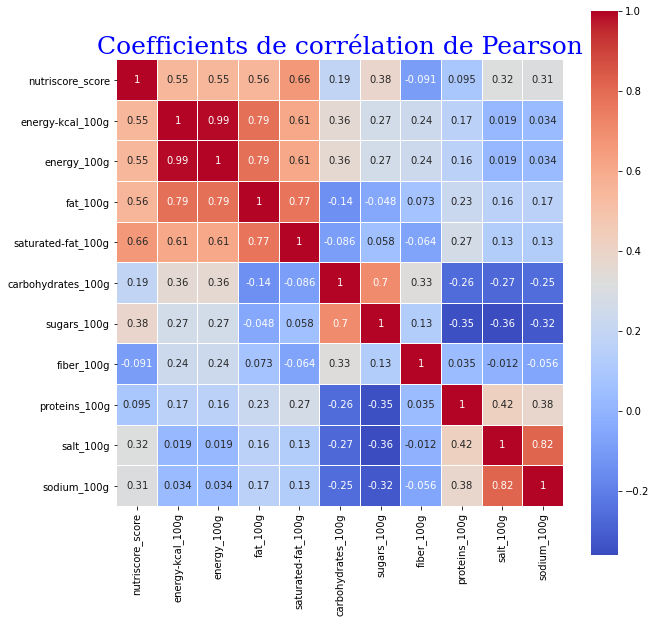

In [21]:
#visualiser les resultats dans un heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrice_corr, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font)
plt.show()

In [22]:
#on a détecter qu'il y a une relation de corrélation linéaire entre le nutriscore_score et plusieurs varables
#aussi entre des paires des variables 

#la catégorie de produits a une influence sur le nutriscore_score.

#donc on peut chercher un modèle statistique optimal pour estimer les scores de nutriscore_score et les grades de nutriscore_grade
#basant sur les variables corrolées et la catégorie de produits(pnns_groups_1) et par la suite l'implementer dans l'application


In [23]:
#visualiser les relations par paires de quelques variables

In [24]:
liste=["nutriscore_score","nutriscore_grade", "energy_100g","energy-kcal_100g", "fat_100g","saturated-fat_100g", "carbohydrates_100g", "sugars_100g"]

In [25]:
data_paire=data[liste]

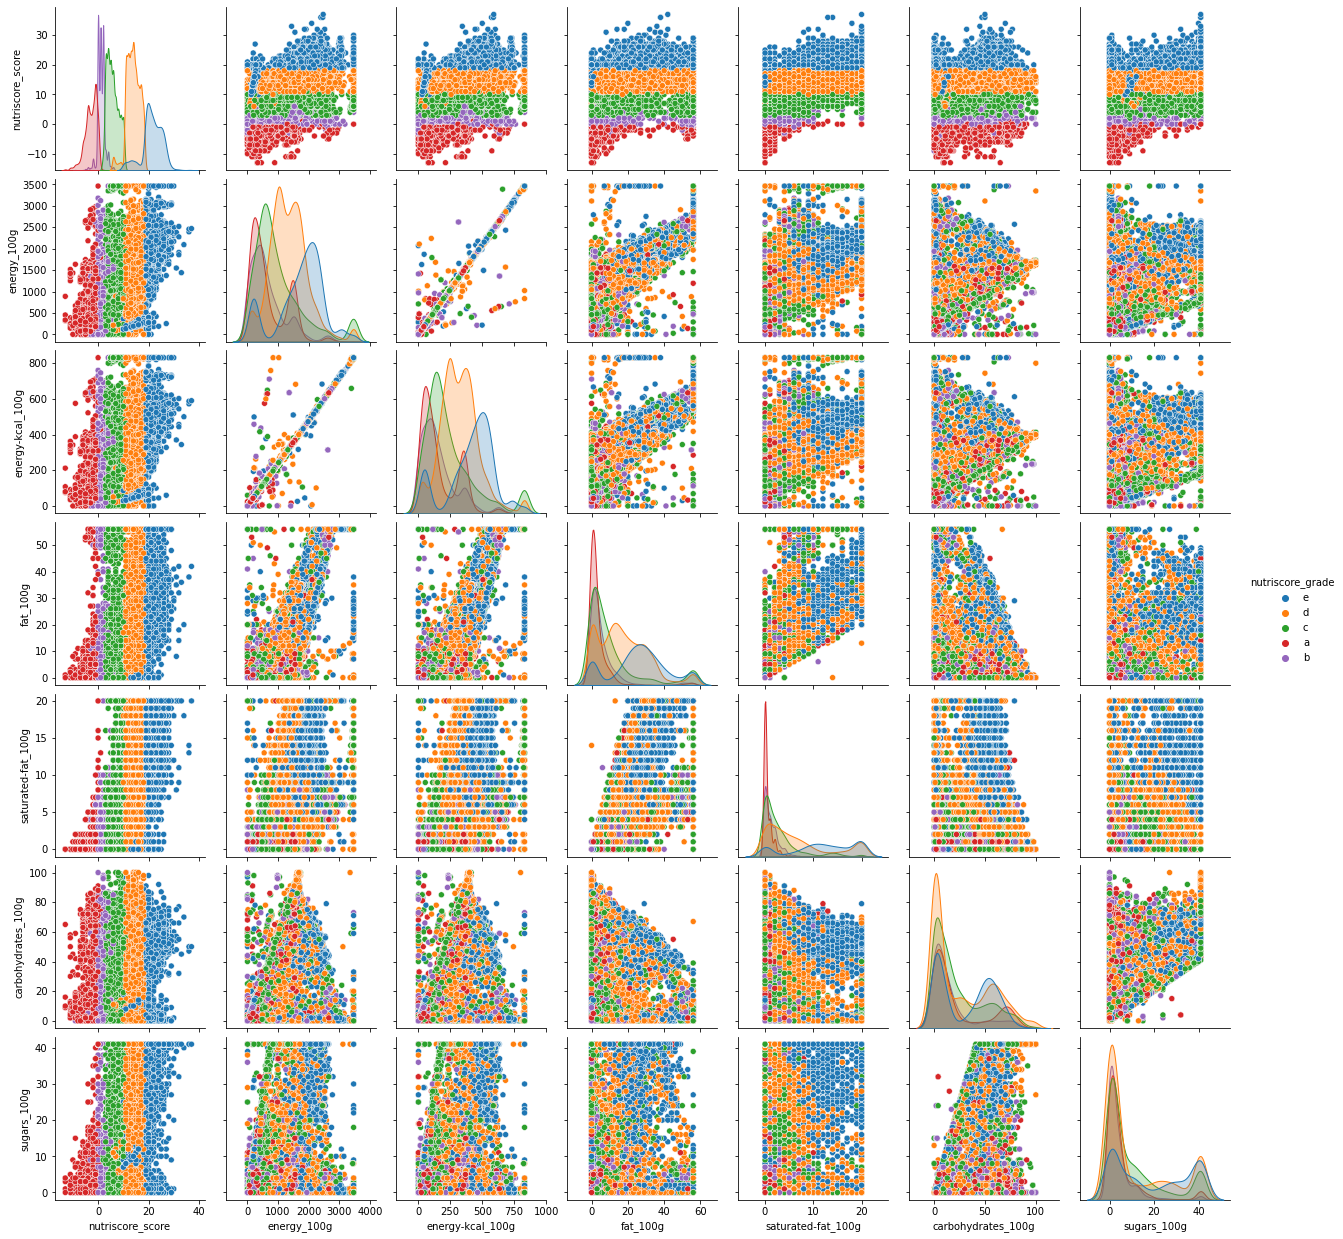

In [26]:
sns.pairplot(data_paire.sample(frac=0.05), hue="nutriscore_grade")

In [27]:
#supprimer les variables corrolées entres eux  (reduction de dimension)
data.drop(['sodium_100g','carbohydrates_100g','fat_100g',"energy-kcal_100g"], axis=1, inplace=True)

In [28]:
#3-Analyses multivariées : 

In [ ]:
#Notre concept d'application pourrait donc être d'estimer le score Nutriscore et le grade correspondant 
#grâce à plusieurs estimateurs ,basant sur les variables corrolées, tout en utilisant la catégorie du produit.

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
estimateurs_dic={"Baseline" : DummyRegressor(strategy='mean'),
                 "LinearRegression" :LinearRegression(),
                 " DecisionTreeRegressor" : DecisionTreeRegressor(max_features='sqrt', random_state=0),
                 "ExtraTreesRegressor" : ExtraTreesRegressor(n_estimators=10, random_state=0),
                 "KNN" :neighbors.KNeighborsClassifier(n_neighbors=15)}


data_num = data.select_dtypes(include=['float64','int64'])

y = data_num['nutriscore_score'].values
X = data_num.drop('nutriscore_score', axis=1)

cols_num = list(X.columns)
num_transformer = StandardScaler()

cols_cat= list(['pnns_groups_1'])
col_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, cols_num),#standardiser pour placer sur la même echèle
                                               ('cat', col_transformer, cols_cat)]) #encoder les variables catégorielles

X = data[cols_num + cols_cat]
y = data['nutriscore_score']

# spliter le jeu des données en un jeu d'entrainement et un jeu de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_metrique=pd.DataFrame()

for estim in estimateurs_dic.keys():
    pipeline_estim = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model',estimateurs_dic[estim])])


    pipeline_estim.fit(X_train, y_train)
    y_pred = pipeline_estim.predict(X_test) #prédictions des scores de nutriscore_score
    
    r2 = r2_score(y_test, y_pred)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    dict_metri= {"Métrique":["R²", "RMSE"],estim:[r2, rmse]}
    
    for k,v in dict_metri.items():
        
        model_metrique[k] = v
    
model_metrique   



,Métrique,Baseline,LinearRegression,DecisionTreeRegressor,ExtraTreesRegressor,KNN
0,R²,-6.296619e-07,0.792549,0.858361,0.900195,0.858846
1,RMSE,8.640056e+00,3.935262,3.251682,2.729556,3.246109


In [31]:
#Les métriques de  modèle ExtraTreesRegressor sont  meilleurs que la baseline el les autres 3 modèles.
#Le coefficient de détermination R² qui est le carré du coefficient de corrélation linéaire, 
#est de 0.90 (le plus grand par rapport aux autres coefficients) et 
#La racine de l'erreur quadratique moyenne RMSE est de 2.72 (la plus petite par rapport aux autres RMSE) pour ce modèle,
#donc on selectionne  ExtraTreesRegressor  comme meilleur  modèle de prédiction.


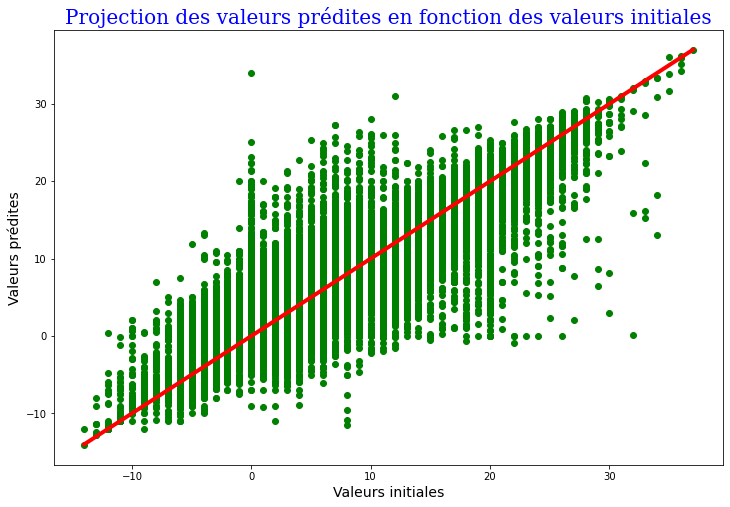

In [32]:
#Visualisation des valeurs prédites en fonctions des valeurs initiales avec le modèle optimal ExtraTreesRegressor:
ExtraTreesRegressor = ExtraTreesRegressor(n_estimators=10, random_state=0)
pipeline_Extra = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', ExtraTreesRegressor)])
pipeline_Extra .fit(X_train, y_train)
y_pred  = pipeline_Extra .predict(X_test)
X_plot = [y_test.min(), y_test.max()]
fig = plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred,c="g")
plt.plot(X_plot, X_plot, color='r',linewidth=4)
plt.xlabel("Valeurs initiales",fontsize=14)
plt.ylabel("Valeurs prédites",fontsize=14)
plt.title("Projection des valeurs prédites en fonction des valeurs initiales", fontdict=font, fontsize=20)
plt.show()

In [33]:
#On remarque une dispersion très faible des prédictions aux valeurs test dû au bon modèle de prédiction 

In [34]:
X.columns

Index(['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'pnns_groups_1'],
      dtype='object')

In [62]:
#Prédiction des scores de nutriscore_score avec ExtraTreesRegressor dans notre jeu des données
nutriscore_score_pred= pipeline_Extra .predict(X)

#Ajouter les scores de nutriscore_score_pred à notre jeu de données
data['nutriscore_score_pred'] = nutriscore_score_pred.tolist()
data[['nutriscore_score_pred']]=data[['nutriscore_score_pred']].astype('int64')

In [63]:
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows",1000)

In [64]:
data.iloc[0:50]

,code,product_name,pnns_groups_2,main_category_en,image_small_url,image_url,nutriscore_score,nutriscore_grade,pnns_groups_1,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_score_pred,nutriscore_grade_pred
0,0000000000100,moutarde au moût de raisin,dressings and sauces,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,18.0,d,fat and sauces,936.0,2.0,22.0,0.0,5.0,3.0,15,d
1,0000000000949,Salade de carottes râpées,one dish meals,Seasoned shredded carrots,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,134.0,0.0,4.0,3.0,1.0,0.0,1,b
2,0000000001281,Tarte noix de coco,biscuits and cakes,Coconut pies,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,14.0,d,sugary snacks,1594.0,16.0,22.0,4.0,5.0,0.0,14,d
3,0000000001885,Compote de poire,fruits,Pear compotes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,-2.0,a,fruits and vegetables,657.0,0.0,27.0,4.0,1.0,0.0,-2,a
4,0000000002257,Salade de macedoine de légumes,one dish meals,Vegetables macedoines,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,598.0,1.0,1.0,5.0,2.0,0.0,1,b
5,0000000005005,Abondance,cheese,Abondance,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,14.0,d,milk and dairy products,1661.0,20.0,0.0,0.0,25.0,1.0,14,d
6,0000000005166,cuisse de poulet direct au four curry,meat,Chicken thighs,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,4.0,c,fish meat eggs,824.0,4.0,1.0,0.0,17.0,1.0,4,c
7,0000000005241,Bagel,bread,Bagel breads,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,b,cereals and potatoes,824.0,1.0,3.0,2.0,8.0,0.0,0,b
8,0000000005470,BAguette bressan,bread,Baguettes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,-4.0,a,cereals and potatoes,669.0,0.0,1.0,2.0,10.0,0.0,-4,a
9,0000000005661,Pavé de saumon fumé à la ficelle,fish and seafood,fr:paves-de-saumon-fume,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,15.0,d,fish meat eggs,1059.0,3.0,0.0,0.0,23.0,2.0,15,d


In [65]:
#calculer les grades correspondants aux scores de nutriscore_score_pred 

def nutrigrade(row):
    if row["nutriscore_score_pred"] <= -1 :
        nutriscore_grade_pred = "a"
    elif ((row["nutriscore_score_pred"] >= 0) & (row["nutriscore_score_pred"] <= 2)) :
        nutriscore_grade_pred = "b"
    elif ((row["nutriscore_score_pred"] >= 3) & (row["nutriscore_score_pred"] <= 10)) :
        nutriscore_grade_pred = "c"
    elif ((row["nutriscore_score_pred"] >= 11) & (row["nutriscore_score_pred"] <= 18)) :
        nutriscore_grade_pred = "d"
    else:
        nutriscore_grade_pred = "e"
        
    return nutriscore_grade_pred

data['nutriscore_grade_pred'] = data.apply(lambda row: nutrigrade(row),axis=1)

In [66]:
data.iloc[0:5]

,code,product_name,pnns_groups_2,main_category_en,image_small_url,image_url,nutriscore_score,nutriscore_grade,pnns_groups_1,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_score_pred,nutriscore_grade_pred
0,0000000000100,moutarde au moût de raisin,dressings and sauces,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,18.0,d,fat and sauces,936.0,2.0,22.0,0.0,5.0,3.0,15,d
1,0000000000949,Salade de carottes râpées,one dish meals,Seasoned shredded carrots,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,134.0,0.0,4.0,3.0,1.0,0.0,1,b
2,0000000001281,Tarte noix de coco,biscuits and cakes,Coconut pies,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,14.0,d,sugary snacks,1594.0,16.0,22.0,4.0,5.0,0.0,14,d
3,0000000001885,Compote de poire,fruits,Pear compotes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,-2.0,a,fruits and vegetables,657.0,0.0,27.0,4.0,1.0,0.0,-2,a
4,0000000002257,Salade de macedoine de légumes,one dish meals,Vegetables macedoines,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,598.0,1.0,1.0,5.0,2.0,0.0,1,b


In [67]:
###################################################################
###################################################################

Approved. You can enter!
3258561140803


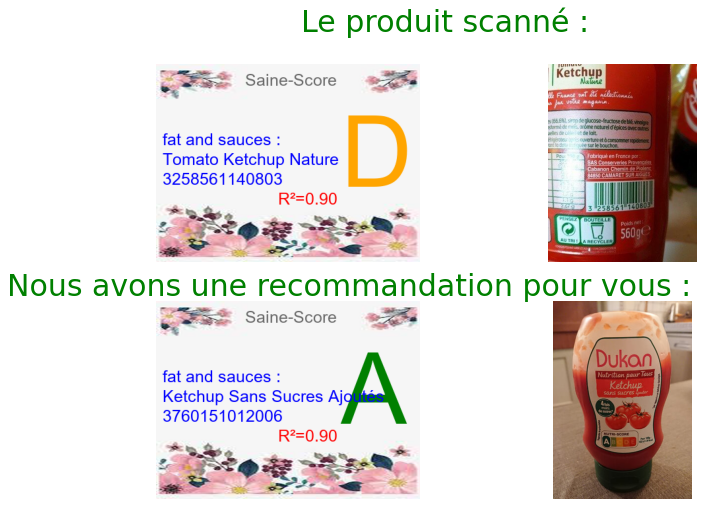

In [74]:
# 4-Application : 

#après avoir scanner le code-barres du produit, 
#l’application  informe l’utilisateur du score Saine-Score associé, une note entre A et E sera établie.
#L’application recommande également un produit avec un meilleur score Saine-Score,
#l’utilisateur peut alors choisir un produit plus adapté à son régime alimentaire.

import cv2
from pyzbar.pyzbar import decode
import time
cap=cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
used_code=''
camera=True
while camera==True:
        success, frame = cap.read()
        for code in decode(frame) :
            if code.data.decode("utf-8") != used_code :
                        
                    print("Approved. You can enter!")
                    print(code.data.decode("utf-8"))
                    used_code=code.data.decode("utf-8")
                    time.sleep(2)
            elif code.data.decode("utf-8") == used_code :
                    print("sorry, this code has been already used!")
                    time.sleep(2)
            else :
                break
        if used_code !='':
            camera=False
        
                
            
cv2.imshow("Testing-code-scan", frame)
cv2.waitKey(1)
cv2.destroyAllWindows()
cap.release()




from PIL import Image
from IPython.display import display
from PIL import Image 
from PIL import ImageFont
from PIL import ImageDraw
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib import rcParams

lettre=["A","B","C","D","E"]
images=[]
for i in lettre:
    img = Image.open('flower2.jpg')
    img = img.resize((400, 300), Image.ANTIALIAS)
    font = ImageFont.truetype("arial.ttf", 150)
    
    draw = ImageDraw.Draw(img)
    if i=="A":
        fill="green"
    elif i=="B":
        fill="limegreen"
    elif i=="C":
        fill="yellow"
    elif i=="D":
        fill="orange"
    else:
        fill="darkgoldenrod"
    draw.text((280, 50),i,align ="right",font=font,fill =fill)
    images.append(img)
    
scoregrade=''
rcParams['figure.figsize'] = 11 ,8
fig, ax = plt.subplots(2,2)
fig.suptitle("Le produit scanné :",fontsize=30,color="green")
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

if used_code in data.loc[:,"code"].values:
    scoregrade=data.loc[data.code==used_code,"nutriscore_grade_pred"].values
    scorenutri=data.loc[data.code==used_code,"nutriscore_score_pred"].values[0]
    if scoregrade=="a":
        draw2 = ImageDraw.Draw(images[0])
        font2 = ImageFont.truetype("arial.ttf", 25)
        draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
        draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
        draw2.text((10, 160),used_code,align ="right",font=font2,fill ="blue")
        draw2.text((10, 130),str(data.loc[data.code==used_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
        draw2.text((10, 100),str(data.loc[data.code==used_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
        url=data.loc[data.code==used_code,"image_url"].values[0]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        ax[0,0].imshow(images[0]);
        ax[0,1].imshow(img);
        
        
        cat=data.loc[data.code==used_code,"main_category_en"].values[0]
        souscats=data.loc[data.loc[:,"main_category_en"].values==cat]
        nutriscore_min=souscats['nutriscore_score_pred'].min()
        if nutriscore_min < scorenutri :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[0])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[0]);
            ax[1,1].imshow(img);
        else :
            print("Bravo! c'est le meilleur choix, nous n'avons pas de recommandationsno reco")
        
        
    elif scoregrade=="b":
        draw2 = ImageDraw.Draw(images[1])
        font2 = ImageFont.truetype("arial.ttf", 25)
        draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
        draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
        draw2.text((10, 160),used_code,align ="right",font=font2,fill ="blue")
        draw2.text((10, 130),str(data.loc[data.code==used_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
        draw2.text((10, 100),str(data.loc[data.code==used_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
        url=data.loc[data.code==used_code,"image_url"].values[0]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        ax[0,0].imshow(images[1]);
        ax[0,1].imshow(img);
        
        
        cat=data.loc[data.code==used_code,"main_category_en"].values[0]
        souscats=data.loc[data.loc[:,"main_category_en"].values==cat]
        nutriscore_min=souscats['nutriscore_score_pred'].min()
        if nutriscore_min < 0 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[0])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[0]);
            ax[1,1].imshow(img);
        else :
            print("Bravo! c'est le meilleur choix, nous n'avons pas de recommandationsno reco")
      
        
    elif scoregrade=="c":
        draw2 = ImageDraw.Draw(images[2])
        font2 = ImageFont.truetype("arial.ttf", 25)
        draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
        draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
        draw2.text((10, 160),used_code,align ="right",font=font2,fill ="blue")
        draw2.text((10, 130),str(data.loc[data.code==used_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
        draw2.text((10, 100),str(data.loc[data.code==used_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
        url=data.loc[data.code==used_code,"image_url"].values[0]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        ax[0,0].imshow(images[2]);
        ax[0,1].imshow(img);
            
        
        cat=data.loc[data.code==used_code,"main_category_en"].values[0]
        souscats=data.loc[data.loc[:,"main_category_en"].values==cat]
        nutriscore_min=souscats['nutriscore_score_pred'].min()
        if nutriscore_min < 0 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[0])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[0]);
            ax[1,1].imshow(img);
        elif nutriscore_min >= 0 & nutriscore_min <= 2 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[1])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[1]);
            ax[1,1].imshow(img);
        else : 
            print("Bravo! c'est le meilleur choix, nous n'avons pas de recommandations")
                  
        
    elif scoregrade=="d":
        draw2 = ImageDraw.Draw(images[3])
        font2 = ImageFont.truetype("arial.ttf", 25)
        draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
        draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
        draw2.text((10, 160),used_code,align ="right",font=font2,fill ="blue")
        draw2.text((10, 130),str(data.loc[data.code==used_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
        draw2.text((10, 100),str(data.loc[data.code==used_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")

        url=data.loc[data.code==used_code,"image_url"].values[0]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        ax[0,0].imshow(images[3]);
        ax[0,1].imshow(img);
        
        
        cat=data.loc[data.code==used_code,"main_category_en"].values[0]
        souscats=data.loc[data.loc[:,"main_category_en"].values==cat]
        nutriscore_min=souscats['nutriscore_score_pred'].min()
        if nutriscore_min < 0 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[0])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[0]);
            ax[1,1].imshow(img);

        elif nutriscore_min >= 0 & nutriscore_min <= 2 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[1])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[1]);
            ax[1,1].imshow(img);
        elif nutriscore_min >= 3 & nutriscore_min <= 10 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[2])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[2]);
            ax[1,1].imshow(img);
        else :
            print("Bravo! c'est le meilleur choix, nous n'avons pas de recommandations")
            
             
        
    else:
        draw2 = ImageDraw.Draw(images[4])
        font2 = ImageFont.truetype("arial.ttf", 25)
        draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
        draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
        draw2.text((10, 160),used_code,align ="right",font=font2,fill ="blue")
        draw2.text((10, 130),str(data.loc[data.code==used_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
        draw2.text((10, 100),str(data.loc[data.code==used_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
        url=data.loc[data.code==used_code,"image_url"].values[0]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        ax[0,0].imshow(images[4]);
        ax[0,1].imshow(img);
        
        
        
        cat=data.loc[data.code==used_code,"main_category_en"].values[0]
        souscats=data.loc[data.loc[:,"main_category_en"].values==cat]
        nutriscore_min=souscats['nutriscore_score_pred'].min()
        if nutriscore_min < 0 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[0])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[0]);
            ax[1,1].imshow(img);
        elif nutriscore_min >= 0 & nutriscore_min <=2 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[1])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[1]);
            ax[1,1].imshow(img);
        elif nutriscore_min >= 3 & nutriscore_min <= 10 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[2])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[2]);
            ax[1,1].imshow(img);
            
        elif nutriscore_min >= 11 & nutriscore_min<= 18 :
            new_code=souscats.loc[souscats.nutriscore_score_pred==nutriscore_min,"code"].values[0]
            draw2 = ImageDraw.Draw(images[3])
            font2 = ImageFont.truetype("arial.ttf", 25)
            draw2.text((135, 10),"Saine-Score",align ="center",font=font2,fill ="dimgrey")
            draw2.text((185, 190),"R²=0.90",align ="right",font=font2,fill ="red")
            draw2.text((10, 160),new_code,align ="right",font=font2,fill ="blue")
            draw2.text((10, 130),str(data.loc[data.code==new_code,"product_name"].values[0]),align ="right",font=font2,fill ="blue")
            draw2.text((10, 100),str(data.loc[data.code==new_code,"pnns_groups_1"].values[0]) + " : ",align ="right",font=font2,fill ="blue")
            url=data.loc[data.code==new_code,"image_url"].values[0]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            plt.title("Nous avons une recommandation pour vous :",fontsize=30,color="green",loc='right')
            ax[1,0].imshow(images[3]);
            ax[1,1].imshow(img);
            
            
        else :
            print("Bravo! c'est le meilleur choix, nous n'avons pas de recommandations")    
        
else:
    print(str(used_code)+" n'est pas dans notre jeu de données, prendre photo table des nutriments")
    
    